<a href="https://colab.research.google.com/github/Normal-case/DeepLearning/blob/master/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
print(tensorflow.keras.__version__)

2.4.0


In [7]:
TRAIN_DIR = './drive/My Drive/인공지능 큐레이터/Deep Learning/data/dental_image/train/'

In [4]:
IM_WIDTH = 220
IM_HEIGHT = 220

In [5]:
# 실행할 때마다 변형된 이미지를 리턴해서
# 이미지가 많은 것 같은 효과를 줌
datagen = ImageDataGenerator(
    rotation_range = 180, # 회전 최대 180도
    width_shift_range = 0.2, # 좌우 이동 최대 이미지 가로사이즈 20%
    height_shift_range = 0.2, # 상하 이동 최대 이미지 세로사이즈 20%
    horizontal_flip = True, # 좌우 반전 실행
    vertical_flip = True # 상하 반전 실행
)

In [8]:
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (IM_WIDTH, IM_HEIGHT),
    batch_size = 1,
    class_mode = 'categorical',
    shuffle = True
)

Found 140 images belonging to 3 classes.


In [9]:
train_generator.n

140

In [10]:
train_generator.batch_size

1

In [11]:
img, label = train_generator.next()
img

array([[[[ 26.182365,  26.091183,  23.908817],
         [ 26.      ,  26.      ,  24.      ],
         [ 26.      ,  26.      ,  24.      ],
         ...,
         [183.89891 , 173.34837 , 129.24728 ],
         [183.      , 172.      , 127.      ],
         [176.4677  , 164.01607 , 119.01607 ]],

        [[ 28.      ,  27.      ,  23.      ],
         [ 27.69087 ,  26.845436,  23.154564],
         [ 27.248837,  26.624418,  23.375582],
         ...,
         [183.01485 , 172.02226 , 127.03711 ],
         [183.      , 172.      , 127.      ],
         [174.47855 , 161.58488 , 116.584885]],

        [[ 28.083445,  27.      ,  22.958277],
         [ 28.      ,  27.      ,  23.      ],
         [ 28.      ,  27.      ,  23.      ],
         ...,
         [183.      , 172.      , 127.      ],
         [181.26682 , 169.88167 , 124.88166 ],
         [174.      , 161.      , 116.      ]],

        ...,

        [[ 37.      , 181.      , 156.      ],
         [ 37.      , 181.      , 156.      ]

In [12]:
label

array([[0., 1., 0.]], dtype=float32)

In [13]:
label_num = np.argmax(label, 1)
label_num

array([1])

In [14]:
img = img/255
img

array([[[[0.10267594, 0.10231836, 0.09376007],
         [0.10196079, 0.10196079, 0.09411765],
         [0.10196079, 0.10196079, 0.09411765],
         ...,
         [0.7211722 , 0.67979753, 0.5068521 ],
         [0.7176471 , 0.6745098 , 0.49803922],
         [0.6920302 , 0.6432003 , 0.46672967]],

        [[0.10980392, 0.10588235, 0.09019608],
         [0.10859165, 0.10527622, 0.09080222],
         [0.10685818, 0.10440949, 0.09166895],
         ...,
         [0.7177053 , 0.6745971 , 0.49818474],
         [0.7176471 , 0.6745098 , 0.49803922],
         [0.6842296 , 0.6336662 , 0.45719564]],

        [[0.11013115, 0.10588235, 0.09003246],
         [0.10980392, 0.10588235, 0.09019608],
         [0.10980392, 0.10588235, 0.09019608],
         ...,
         [0.7176471 , 0.6745098 , 0.49803922],
         [0.71085024, 0.6662026 , 0.489732  ],
         [0.68235296, 0.6313726 , 0.45490196]],

        ...,

        [[0.14509805, 0.70980394, 0.6117647 ],
         [0.14509805, 0.70980394, 0.6117647 ]

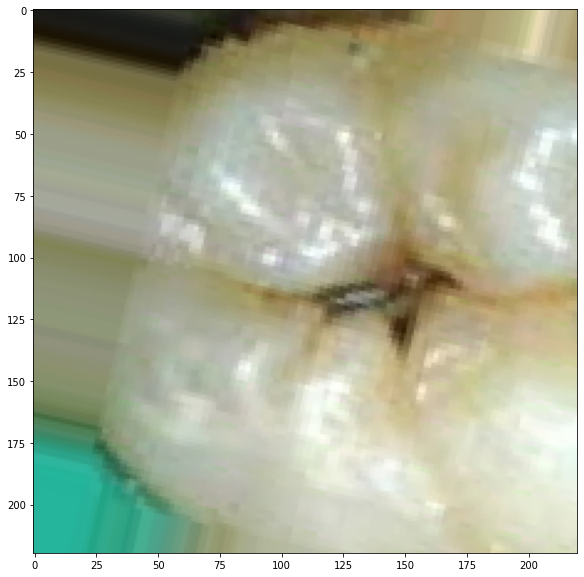

In [15]:
plt.figure(figsize = (20, 10))
plt.imshow(img.reshape((IM_WIDTH, IM_HEIGHT, 3)))
plt.show()

In [16]:
index = 0
# 증강시킨 20개의 이미지를 저장할 리스트
all_generate_img = []

# datagen.flow(img) : img를 회전, 수평이동, 수직이동, 좌우반전, 상하 반전등으로 증강 시켜서 리턴
# generate_img : 증강시킨 데이터가 저장됨
for generate_img in datagen.flow(img):
  all_generate_img.append(generate_img)
  index += 1
  if index > 20:
    break

In [17]:
all_generate_img

[array([[[[0.9112387 , 0.96327114, 0.9137255 ],
          [0.9102504 , 0.96489894, 0.9140453 ],
          [0.9122195 , 0.96603996, 0.9183041 ],
          ...,
          [0.62448657, 0.52665776, 0.3202379 ],
          [0.622495  , 0.5123632 , 0.3081506 ],
          [0.56338614, 0.45687693, 0.2573175 ]],
 
         [[0.9133565 , 0.9611533 , 0.9137255 ],
          [0.91035795, 0.96415186, 0.9137255 ],
          [0.91034555, 0.9651143 , 0.9142005 ],
          ...,
          [0.60272986, 0.5175807 , 0.31133765],
          [0.5529399 , 0.46529424, 0.26347792],
          [0.53635514, 0.4359036 , 0.23589493]],
 
         [[0.91377944, 0.9608113 , 0.9136985 ],
          [0.91247576, 0.96203405, 0.9137255 ],
          [0.9101168 , 0.9645965 , 0.91382724],
          ...,
          [0.5544921 , 0.48184824, 0.28353694],
          [0.53043205, 0.45181832, 0.25162637],
          [0.5268844 , 0.44060943, 0.24062672]],
 
         ...,
 
         [[0.6354967 , 0.6539551 , 0.50283927],
          [0.62716

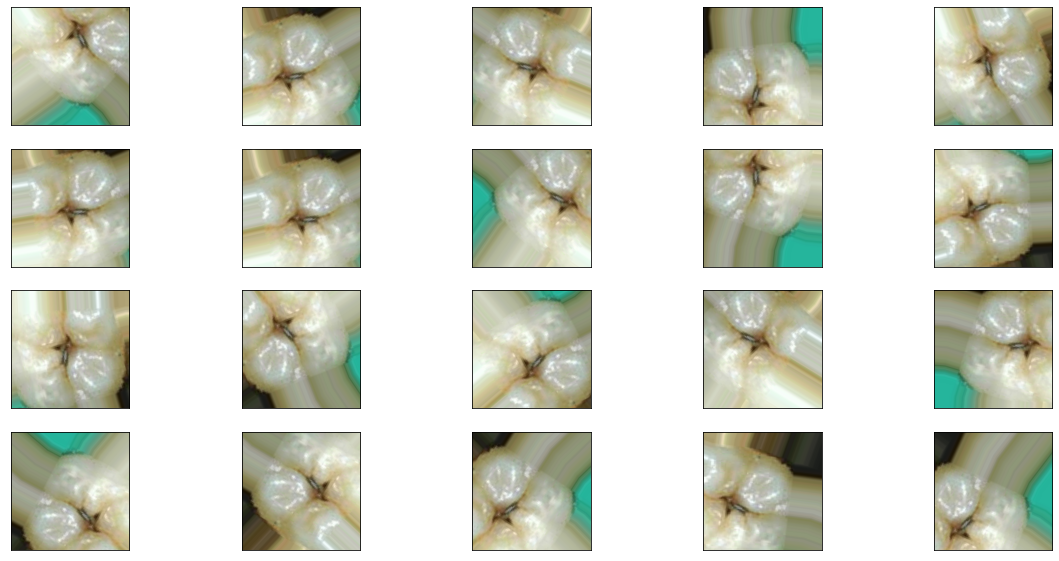

In [18]:
fig = plt.figure(figsize = (20, 10))

for i in range(20):
  subplot = fig.add_subplot(4, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.imshow(all_generate_img[i][0])

plt.show()